In [1]:
import pandas as pd
import math
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
LaCrimeDF = pd.read_csv("LaCrime2.csv")
LaWeatherDF = pd.read_csv("LaWeather.csv")

In [3]:
LaCrimeDF.head()
# Raw Crime table


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [4]:
LaWeatherDF.head()
# Raw Weather Table

,Station,Date,Time,Interval,Air max,Air max time,Air min,Air min time,Air avg,RH avg,Precip,Chill hrs,Hrs 32F,Hrs 85F,Hrs 95F
0,20140101,2400,1440,67,14:50,27,05:14,42,76,0.00,15.2,6.9,0.0,0.00,NaN
1,20140102,2400,1440,66,14:07,29,06:01,44,75,0.00,14.3,3.3,0.0,0.00,NaN
2,20140103,2400,1440,63,14:23,29,05:37,43,79,0.00,15.4,3.2,0.0,0.00,NaN
3,20140104,2400,1440,66,15:04,29,05:17,44,76,0.00,14.0,3.4,0.0,0.00,NaN
4,20140105,2400,1440,68,15:17,28,07:01,44,78,0.00,14.1,3.3,0.0,0.00,NaN


In [5]:
# Clean crime columns
# del LaCrimeDF["AREA"]
del LaCrimeDF["AREA NAME"]
del LaCrimeDF["Rpt Dist No"]
del LaCrimeDF["Crm Cd 2"]
del LaCrimeDF["Crm Cd 3"]
del LaCrimeDF["Crm Cd 4"]
del LaCrimeDF["LOCATION"]
del LaCrimeDF["Cross Street"]
del LaCrimeDF["LAT"]
del LaCrimeDF["Status"]
del LaCrimeDF["Status Desc"]
del LaCrimeDF["LON"]
del LaCrimeDF["Weapon Desc"]
del LaCrimeDF["Weapon Used Cd"] 
del LaCrimeDF["Premis Desc"]
del LaCrimeDF["Vict Descent"]
del LaCrimeDF["Vict Sex"]
del LaCrimeDF["Vict Age"]
del LaCrimeDF["Date Rptd"]
del LaCrimeDF["Part 1-2"]
del LaCrimeDF["DR_NO"]
LaCrimeDF.head()

,DATE OCC,TIME OCC,AREA,Crm Cd,Crm Cd Desc,Mocodes,Premis Cd,Crm Cd 1
0,02/20/2010 12:00:00 AM,1350,13,900,VIOLATION OF COURT ORDER,0913 1814 2000,501.0,900.0
1,09/12/2010 12:00:00 AM,45,14,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,101.0,740.0
2,08/09/2010 12:00:00 AM,1515,13,946,OTHER MISCELLANEOUS CRIME,0344,103.0,946.0
3,01/05/2010 12:00:00 AM,150,6,900,VIOLATION OF COURT ORDER,1100 0400 1402,101.0,900.0
4,01/02/2010 12:00:00 AM,2100,1,122,"RAPE, ATTEMPTED",0400,103.0,122.0


In [6]:
# Clean Weather columns
# del LaWeatherDF["Station"]
del LaWeatherDF["Time"]
del LaWeatherDF["Date"]
del LaWeatherDF["Air max"]
del LaWeatherDF["Air min"]
del LaWeatherDF["RH avg"]
del LaWeatherDF["Precip"]
del LaWeatherDF["Chill hrs"]
del LaWeatherDF["Hrs 32F"]
del LaWeatherDF["Hrs 85F"]
del LaWeatherDF["Hrs 95F"]
del LaWeatherDF["Air avg"]


In [7]:
LaWeatherDF.rename(columns={'Station': 'Date', 'Interval': 'Temp Max','Air max time': 'Temp Min', 'Air min time':'Temp Avg'}, inplace=True)
LaWeatherDF.head()

,Date,Temp Max,Temp Min,Temp Avg
0,20140101,67,27,42
1,20140102,66,29,44
2,20140103,63,29,43
3,20140104,66,29,44
4,20140105,68,28,44


In [8]:
# for ind in LaCrimeDF.index:
#     take = LaCrimeDF.loc[ ind,'DATE OCC']
#     if((int(str(take)[6:-12]) < 2014) or (int(str(take)[6:-12]) > 2017)):
#         LaCrimeDF.drop(ind)

In [9]:
LaCrimeDF["Date"] = pd.to_datetime(LaCrimeDF["DATE OCC"]).dt.date
del LaCrimeDF["DATE OCC"]
LaCrimeDF.head()

,TIME OCC,AREA,Crm Cd,Crm Cd Desc,Mocodes,Premis Cd,Crm Cd 1,Date
0,1350,13,900,VIOLATION OF COURT ORDER,0913 1814 2000,501.0,900.0,2010-02-20
1,45,14,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,101.0,740.0,2010-09-12
2,1515,13,946,OTHER MISCELLANEOUS CRIME,0344,103.0,946.0,2010-08-09
3,150,6,900,VIOLATION OF COURT ORDER,1100 0400 1402,101.0,900.0,2010-01-05
4,2100,1,122,"RAPE, ATTEMPTED",0400,103.0,122.0,2010-01-02


In [10]:
year = []
month = []
day = []
for ind in LaWeatherDF.index:
    take = LaWeatherDF.loc[ ind,'Date']
    year.append(int(str(take)[:4]))
    month.append(int(str(take)[4:-2]))
    day.append(int(str(take)[6:]))
LaWeatherDF['Year'] = year
LaWeatherDF['Month'] = month
LaWeatherDF['Day'] = day
LaWeatherDF.head()        

,Date,Temp Max,Temp Min,Temp Avg,Year,Month,Day
0,20140101,67,27,42,2014,1,1
1,20140102,66,29,44,2014,1,2
2,20140103,63,29,43,2014,1,3
3,20140104,66,29,44,2014,1,4
4,20140105,68,28,44,2014,1,5


In [11]:
LaWeatherDF['DATE'] = LaWeatherDF['Year'].map(str) + '-' + LaWeatherDF['Month'].map(str) + '-' +  LaWeatherDF['Day'].map(str)
del LaWeatherDF['Date']
del LaWeatherDF['Year']
del LaWeatherDF['Month']
del LaWeatherDF['Day']
LaWeatherDF.head()

,Temp Max,Temp Min,Temp Avg,DATE
0,67,27,42,2014-1-1
1,66,29,44,2014-1-2
2,63,29,43,2014-1-3
3,66,29,44,2014-1-4
4,68,28,44,2014-1-5


In [12]:
LaWeatherDF["Date"] = pd.to_datetime(LaWeatherDF["DATE"]).dt.date

In [13]:

del LaWeatherDF['DATE']

In [14]:
LaCrimeDF["Report Month"] = pd.DatetimeIndex(LaCrimeDF["Date"]).month
LaCrimeDF["Report Year"] = pd.DatetimeIndex(LaCrimeDF["Date"]).year
LaCrimeDF["Report Day"] = pd.DatetimeIndex(LaCrimeDF["Date"]).day
LaWeatherDF["Report Month"] = pd.DatetimeIndex(LaWeatherDF["Date"]).month
LaWeatherDF["Report Year"] = pd.DatetimeIndex(LaWeatherDF["Date"]).year
LaWeatherDF["Report Day"] = pd.DatetimeIndex(LaWeatherDF["Date"]).day

In [15]:
LaWeatherDF= LaWeatherDF[~(LaWeatherDF['Report Year'] > 2017)]


In [16]:
LaCrimeDF = LaCrimeDF[~(LaCrimeDF['Report Year'] < 2014)]

In [17]:
LaCrimeDF.head()


,TIME OCC,AREA,Crm Cd,Crm Cd Desc,Mocodes,Premis Cd,Crm Cd 1,Date,Report Month,Report Year,Report Day
614215,1030,1,330,BURGLARY FROM VEHICLE,0344,123.0,330.0,2014-06-02,6,2014,2
614216,1200,20,354,THEFT OF IDENTITY,0928 0930 1822 0100,501.0,354.0,2014-03-01,3,2014,1
614217,2100,3,624,BATTERY - SIMPLE ASSAULT,0913 0416 0446 0429,501.0,624.0,2014-08-25,8,2014,25
614218,1300,2,354,THEFT OF IDENTITY,0100 0930 1822,218.0,354.0,2014-03-05,3,2014,5
614219,2345,13,624,BATTERY - SIMPLE ASSAULT,0400 0416,502.0,624.0,2014-01-03,1,2014,3


In [18]:
CrimeCategory = LaCrimeDF["Crm Cd Desc"].value_counts()
print(CrimeCategory)
LaCrimeDF.shape

BATTERY - SIMPLE ASSAULT                                   111375
VEHICLE - STOLEN                                            99275
BURGLARY FROM VEHICLE                                       97161
THEFT PLAIN - PETTY ($950 & UNDER)                          91913
BURGLARY                                                    86131
                                                            ...  
BLOCKING DOOR INDUCTION CENTER                                  3
TRAIN WRECKING                                                  2
FIREARMS RESTRAINING ORDER (FIREARMS RO)                        2
TILL TAP - ATTEMPT                                              2
FIREARMS TEMPORARY RESTRAINING ORDER (TEMP FIREARMS RO)         1
Name: Crm Cd Desc, Length: 141, dtype: int64


(1315466, 11)

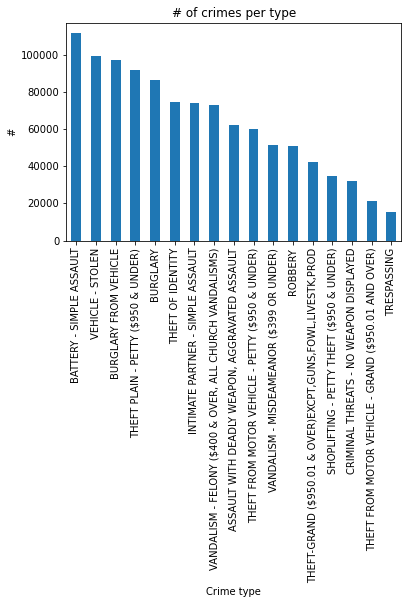

In [19]:
shw = LaCrimeDF[-LaCrimeDF['Crm Cd Desc'].isin(CrimeCategory[CrimeCategory < 15000].index)]
ax = (shw["Crm Cd Desc"].value_counts()).plot(title="# of crimes per type", kind = "bar")
ax.set_xlabel("Crime type")
ax.set_ylabel("#")
plt.xticks(rotation=90)
plt.show()

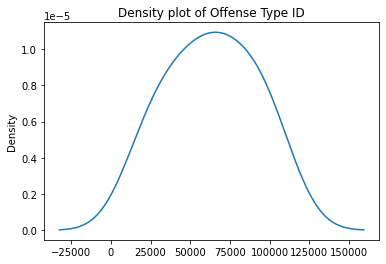

In [20]:
ax2 =(shw["Crm Cd Desc"].value_counts()).plot.kde(title="Density plot of Offense Type ID")

In [21]:
# LaCrimeDF["Report Month"] = pd.DatetimeIndex(LaCrimeDF["Date"]).month
# LaCrimeDF["Report Year"] = pd.DatetimeIndex(LaCrimeDF["Date"]).year
# LaCrimeDF["Report Day"] = pd.DatetimeIndex(LaCrimeDF["Date"]).day
# LaWeatherDF["Report Month"] = pd.DatetimeIndex(LaWeatherDF["Date"]).month
# LaWeatherDF["Report Year"] = pd.DatetimeIndex(LaWeatherDF["Date"]).year
# LaWeatherDF["Report Day"] = pd.DatetimeIndex(LaWeatherDF["Date"]).day

In [22]:
LaCrimeDF.head()

,TIME OCC,AREA,Crm Cd,Crm Cd Desc,Mocodes,Premis Cd,Crm Cd 1,Date,Report Month,Report Year,Report Day
614215,1030,1,330,BURGLARY FROM VEHICLE,0344,123.0,330.0,2014-06-02,6,2014,2
614216,1200,20,354,THEFT OF IDENTITY,0928 0930 1822 0100,501.0,354.0,2014-03-01,3,2014,1
614217,2100,3,624,BATTERY - SIMPLE ASSAULT,0913 0416 0446 0429,501.0,624.0,2014-08-25,8,2014,25
614218,1300,2,354,THEFT OF IDENTITY,0100 0930 1822,218.0,354.0,2014-03-05,3,2014,5
614219,2345,13,624,BATTERY - SIMPLE ASSAULT,0400 0416,502.0,624.0,2014-01-03,1,2014,3


In [23]:
# LaWeatherDF= LaWeatherDF[~(LaWeatherDF['Report Year'] > 2017)]


In [24]:
# LaCrimeDF = LaCrimeDF[~(LaCrimeDF['Report Year'] < 2014)]
LaCrimeDF.head()
# print(res)
# for ind in LaCrimeDF.index:
#     take = LaCrimeDF.loc[ind, 'Report Year']
#     if(int(str(take)) < 2014):
#         LaCrimeDF.drop(ind)

,TIME OCC,AREA,Crm Cd,Crm Cd Desc,Mocodes,Premis Cd,Crm Cd 1,Date,Report Month,Report Year,Report Day
614215,1030,1,330,BURGLARY FROM VEHICLE,0344,123.0,330.0,2014-06-02,6,2014,2
614216,1200,20,354,THEFT OF IDENTITY,0928 0930 1822 0100,501.0,354.0,2014-03-01,3,2014,1
614217,2100,3,624,BATTERY - SIMPLE ASSAULT,0913 0416 0446 0429,501.0,624.0,2014-08-25,8,2014,25
614218,1300,2,354,THEFT OF IDENTITY,0100 0930 1822,218.0,354.0,2014-03-05,3,2014,5
614219,2345,13,624,BATTERY - SIMPLE ASSAULT,0400 0416,502.0,624.0,2014-01-03,1,2014,3


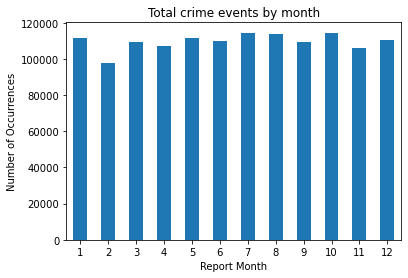

In [25]:
ax = LaCrimeDF.groupby("Report Month").size().plot(kind = "bar", title= "Total crime events by month")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=0)
plt.show()

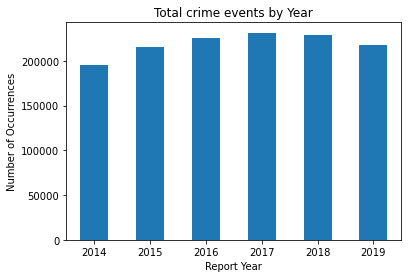

In [26]:
ax = LaCrimeDF.groupby("Report Year").size().plot(kind = "bar", title= "Total crime events by Year")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=0)
plt.show()

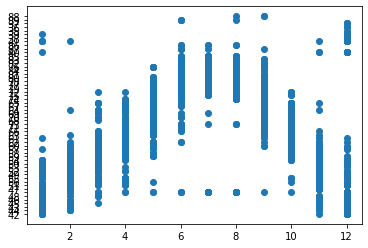

In [27]:
plt.scatter(LaWeatherDF["Report Month"], LaWeatherDF["Temp Avg"])
plt.show()

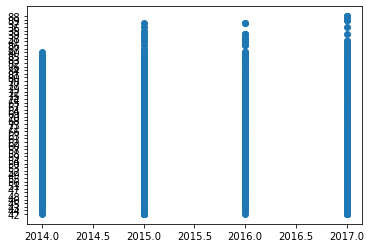

In [28]:
plt.scatter(LaWeatherDF["Report Year"], LaWeatherDF["Temp Avg"])
plt.show()

In [29]:
LaWeatherDF.info()
LaCrimeDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Temp Max      1461 non-null   object
 1   Temp Min      1461 non-null   object
 2   Temp Avg      1461 non-null   object
 3   Date          1461 non-null   object
 4   Report Month  1461 non-null   int64 
 5   Report Year   1461 non-null   int64 
 6   Report Day    1461 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 91.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1315466 entries, 614215 to 2119796
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   TIME OCC      1315466 non-null  int64  
 1   AREA          1315466 non-null  int64  
 2   Crm Cd        1315466 non-null  int64  
 3   Crm Cd Desc   1315466 non-null  object 
 4   Mocodes       1176545 non-null  object 
 5   Premis Cd     1315440 non-n

In [30]:
# LaCrimeDF.nunique()
LaWeatherDF.nunique()

Temp Max          66
Temp Min          55
Temp Avg          56
Date            1461
Report Month      12
Report Year        4
Report Day        31
dtype: int64

In [31]:
LaWeatherDF.rename(columns={'DATE': 'Date'}, inplace=True)


In [32]:
del LaCrimeDF["Report Month"] 
del LaCrimeDF["Report Year"] 
del LaCrimeDF["Report Day"] 
del LaWeatherDF["Report Month"] 
del LaWeatherDF["Report Year"]
del LaWeatherDF["Report Day"] 
LaCrimeDF.dropna(inplace=True)
LaWeatherDF.dropna(inplace=True)


In [33]:
numofcrimes = len(LaCrimeDF.index)
print("Total Crimes:", numofcrimes)

numofweather = len(LaWeatherDF.index)
print("Weather Entries:", numofweather)

Total Crimes: 1176536
Weather Entries: 1461


In [34]:

LaCrimeDF.head()

,TIME OCC,AREA,Crm Cd,Crm Cd Desc,Mocodes,Premis Cd,Crm Cd 1,Date
614215,1030,1,330,BURGLARY FROM VEHICLE,0344,123.0,330.0,2014-06-02
614216,1200,20,354,THEFT OF IDENTITY,0928 0930 1822 0100,501.0,354.0,2014-03-01
614217,2100,3,624,BATTERY - SIMPLE ASSAULT,0913 0416 0446 0429,501.0,624.0,2014-08-25
614218,1300,2,354,THEFT OF IDENTITY,0100 0930 1822,218.0,354.0,2014-03-05
614219,2345,13,624,BATTERY - SIMPLE ASSAULT,0400 0416,502.0,624.0,2014-01-03


In [35]:
LaWeatherDF.head()

,Temp Max,Temp Min,Temp Avg,Date
0,67,27,42,2014-01-01
1,66,29,44,2014-01-02
2,63,29,43,2014-01-03
3,66,29,44,2014-01-04
4,68,28,44,2014-01-05


In [36]:
LaMerged = pd.merge(LaCrimeDF, LaWeatherDF, how='outer', on = 'Date')


In [37]:
LaMerged.head()

,TIME OCC,AREA,Crm Cd,Crm Cd Desc,Mocodes,Premis Cd,Crm Cd 1,Date,Temp Max,Temp Min,Temp Avg
0,1030,1,330,BURGLARY FROM VEHICLE,0344,123.0,330.0,2014-06-02,95,50,74
1,2000,7,664,"BUNCO, PETTY THEFT",0701 0344,502.0,664.0,2014-06-02,95,50,74
2,2050,2,624,BATTERY - SIMPLE ASSAULT,2004 1266 0416,701.0,624.0,2014-06-02,95,50,74
3,1200,12,440,THEFT PLAIN - PETTY ($950 & UNDER),0701 1820 0344,501.0,440.0,2014-06-02,95,50,74
4,100,12,440,THEFT PLAIN - PETTY ($950 & UNDER),0344 1202,502.0,440.0,2014-06-02,95,50,74


In [38]:
LaMerged["Temp Avg"] = pd.to_numeric(LaMerged["Temp Avg"], errors='coerce')

In [39]:
print(LaCrimeDF.dtypes)

TIME OCC         int64
AREA             int64
Crm Cd           int64
Crm Cd Desc     object
Mocodes         object
Premis Cd      float64
Crm Cd 1       float64
Date            object
dtype: object


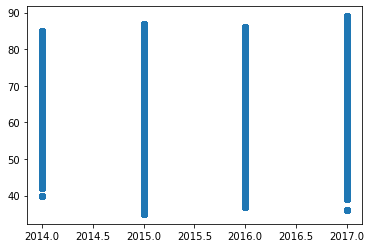

In [40]:
plt.scatter(pd.DatetimeIndex(LaMerged["Date"]).year, LaMerged["Temp Avg"])
plt.show()

In [41]:
temp = LaMerged['Temp Avg']
crimeType = LaMerged['Crm Cd Desc'].unique()
Cold = LaMerged[LaMerged['Temp Avg'] < 45.0]
Hot = LaMerged[LaMerged['Temp Avg']  > 75.0]
Mild = LaMerged[(LaMerged['Temp Avg'] >= 45.0) & (LaMerged['Temp Avg']  <= 75.0)]
numofweathercrimes = len(LaMerged.index)
            

In [42]:
print(crimeType)

['BURGLARY FROM VEHICLE' 'BUNCO, PETTY THEFT' 'BATTERY - SIMPLE ASSAULT'
 'THEFT PLAIN - PETTY ($950 & UNDER)' 'BATTERY POLICE (SIMPLE)'
 'INTIMATE PARTNER - AGGRAVATED ASSAULT'
 'CRIMINAL THREATS - NO WEAPON DISPLAYED'
 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)' 'STALKING'
 'INTIMATE PARTNER - SIMPLE ASSAULT' 'ROBBERY' 'THEFT OF IDENTITY'
 'CHILD NEGLECT (SEE 300 W.I.C.)'
 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT'
 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)' 'BURGLARY'
 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)'
 'CREDIT CARDS, FRAUD USE ($950.01 & OVER)' 'INDECENT EXPOSURE'
 'THREATENING PHONE CALLS/LETTERS'
 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)' 'CRIMINAL HOMICIDE'
 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD' 'BUNCO, GRAND THEFT'
 'BATTERY WITH SEXUAL CONTACT'
 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD'
 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)'
 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER'
 'CHILD ABUSE (PHYSICAL)

In [43]:
display(Cold)

,TIME OCC,AREA,Crm Cd,Crm Cd Desc,Mocodes,Premis Cd,Crm Cd 1,Date,Temp Max,Temp Min,Temp Avg
2057,2345,13,624,BATTERY - SIMPLE ASSAULT,0400 0416,502.0,624.0,2014-01-03,63,29,43.0
2058,1800,19,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0406 0416 1814 0448,101.0,230.0,2014-01-03,63,29,43.0
2059,1930,6,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344,502.0,341.0,2014-01-03,63,29,43.0
2060,1350,17,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0325,404.0,442.0,2014-01-03,63,29,43.0
2061,900,3,440,THEFT PLAIN - PETTY ($950 & UNDER),0344 0701,501.0,440.0,2014-01-03,63,29,43.0
...,...,...,...,...,...,...,...,...,...,...,...
766014,1730,15,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0344 1606,101.0,420.0,2017-12-12,66,28,43.0
766015,1700,11,351,PURSE SNATCHING,0390,101.0,351.0,2017-12-12,66,28,43.0
766016,1100,11,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,501.0,740.0,2017-12-12,66,28,43.0
766017,1855,6,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0325 0104 0601,406.0,341.0,2017-12-12,66,28,43.0


In [44]:
ldf = Hot



# theft = LaCrimeDF.loc[LaCrimeDF['Crm Cd'] == 440].value_counts()
# theft2 = ldf.loc[ldf['Crm Cd'] == 354].value_counts()
# theft3 = ldf.loc[ldf['Crm Cd'] == 420].value_counts()
# theft4 = ldf.loc[ldf['Crm Cd'] == 341].value_counts()
# theft5 = ldf.loc[ldf['Crm Cd'] == 442].value_counts()
# theft6 = ldf.loc[ldf['Crm Cd'] == 520].value_counts()
# theft7 = ldf.loc[ldf['Crm Cd'] == 331].value_counts()

# numoftheft = len(theft.index) +  len(theft2.index) + len(theft3.index) + len(theft4.index) + len(theft5.index) + len(theft6.index) + len(theft7.index)

# vandalism = ldf.loc[ldf['Crm Cd'] == 740].value_counts()
# vandalism2 = ldf.loc[ldf['Crm Cd'] == 745].value_counts()

# numofvandalism = len(vandalism.index) + len(vandalism2.index)


# robbery = ldf.loc[ldf['Crm Cd'] == 210].value_counts()
# numofrobbery = len(robbery.index)


# burglary = ldf.loc[ldf['Crm Cd'] == 330].value_counts()
# burglary2 = ldf.loc[ldf['Crm Cd'] == 510].value_counts()
# burglary3 = ldf.loc[ldf['Crm Cd'] == 310].value_counts()

# numofburglary = len(burglary.index) + len(burglary2.index) + len(burglary3.index)

# arson = ldf.loc[ldf['Crm Cd'] == 648].value_counts()
# numofarson = len(arson.index)

weap = ldf.loc[ldf['Crm Cd'] == 756].value_counts()
numofweap = len(weap.index)
theft = ldf.loc[ldf['Crm Cd Desc'].str.contains("theft", case=False)]
numoftheft = len(theft.index)
vandalism = ldf.loc[ldf['Crm Cd Desc'].str.contains("vandalism", case=False)]
numofvandalism = len(vandalism.index)
robbery = ldf.loc[ldf['Crm Cd Desc'].str.contains("robbery", case=False)]
numofrobbery = len(robbery.index)
burglary = ldf.loc[ldf['Crm Cd Desc'].str.contains("burglary", case=False)]
numofburglary = len(burglary.index)
arson = ldf.loc[ldf['Crm Cd Desc'].str.contains("arson", case=False)]
numofarson = len(arson.index)
trespassing = ldf.loc[ldf['Crm Cd Desc'].str.contains("trespassing", case=False)]
numoftrespassing = len(trespassing.index)

fire = ldf.loc[ldf['Crm Cd Desc'].str.contains("fire", case=False)]
numoffire = len(fire.index)

numcrimeproph = numofburglary + numofrobbery + numoftheft + numofarson + numofvandalism + numoffire + numoftrespassing + numofweap

proppercent = str(round(((numcrimeproph/numofweathercrimes)*100), 2))

print("Crimes Against Property on Hot Days:", numcrimeproph)
print("Percent of Crimes:", proppercent)
print("Theft Crimes:", numoftheft)
print("Vandalism Crimes:", numofvandalism)
print("Robbery Crimes:", numofrobbery)
print("trespassing:", numoftrespassing)
print("Burglary Crimes:", numofburglary)
print("arson Crimes:", numofarson)
print("Weapon Possesion Crimes:", numofweap)
print("Fire Related Crimes:", numoffire)
print()


# assault = ldf.loc[ldf['Crm Cd'] == 624].value_counts()
# assault2 = ldf.loc[ldf['Crm Cd'] == 626].value_counts()
# assault3 = ldf.loc[ldf['Crm Cd'] == 230].value_counts()

# numofassault = len(assault.index) + len(assault2.index) + len(assault3.index)
assault = ldf.loc[ldf['Crm Cd Desc'].str.contains("assault", case=False)]
numofassault = len(assault.index)
homicide = ldf.loc[ldf['Crm Cd Desc'].str.contains("homicide", case=False)]
numofhomicide = len(homicide.index)

kidnap = ldf.loc[ldf['Crm Cd Desc'].str.contains("kidnap", case=False)]
numofkidnap = len(kidnap.index)

stalking = LaCrimeDF.loc[LaCrimeDF['Crm Cd Desc'].str.contains("stalking", case=False)]
# stalk2 = LaCrimeDF.loc[LaCrimeDF['Crm Cd'] == 956].value_counts()
numofstalking = len(stalking.index) 

warrant = ldf.loc[ldf['Crm Cd Desc'].str.contains("vehicle", case=False)]
numofwarrant = len(warrant.index)

medical = ldf.loc[ldf['Crm Cd Desc'].str.contains("Child", case=False)]
numofmedical = len(medical.index)

person = ldf.loc[ldf['Crm Cd Desc'].str.contains("person", case=False)]
numofperson = len(person.index)

harassment = ldf.loc[ldf['Crm Cd Desc'].str.contains("rape", case=False)]
numofharass = len(harassment.index)

numcrimepersonh = numofassault + numofhomicide + numofkidnap + numofwarrant + numofmedical + numofperson + numofharass + numofstalking 

peoplepercent = str(round(((numcrimepersonh/numofweathercrimes)*100), 2))

print("Crimes Against People on Hot Days:", numcrimepersonh)
print("Percent of Crimes:", peoplepercent)
print("Assault Crimes:", numofassault)
print("homicide Crimes:", numofhomicide)
print("kidnap Crimes:", numofkidnap)
print("vehicle:", numofwarrant)
print("stalking:", numofstalking)
print("Child:", numofmedical)
print("Person Crimes:", numofperson)
print("Rape Crimes:", numofharass)
print()

Violations = ldf.loc[ldf['Crm Cd Desc'].str.contains("violation", case=False)]
numofvio = len(Violations.index)

threat = ldf.loc[ldf['Crm Cd'] == 930].value_counts()
numofthreat = len(threat.index)

dsp = ldf.loc[ldf['Crm Cd Desc'].str.contains("DISTURBING THE PEACE", case=False)]
numofdsp = len(dsp.index)

other = ldf.loc[ldf['Crm Cd Desc'].str.contains("other", case=False)]
numofother = len(other.index)

numcrimesocietyh = numofvio + numofthreat + numofother + numofdsp

societypercent = str(round(((numcrimesocietyh/numofweathercrimes)*100), 2))

print("Crimes Against Society/Other on Hot Days:", numcrimesocietyh)
print("Percent of Crimes:", societypercent)
print("Violations:", numofvio)
print("DISTURBING THE PEACE:", numofdsp)
print("Threats:", numofthreat)
print("Other:", numofother)
print()

hotdaycrimetot = numcrimeproph + numcrimepersonh + numcrimesocietyh
print("Total Hot Day Crimes:", hotdaycrimetot) 



print("Percent of Weather Crimes:", (str(round((hotdaycrimetot/numofweathercrimes)*100,2))))

Crimes Against Property on Hot Days: 117191
Percent of Crimes: 9.96
Theft Crimes: 53761
Vandalism Crimes: 20659
Robbery Crimes: 9593
trespassing: 2044
Burglary Crimes: 30138
arson Crimes: 265
Weapon Possesion Crimes: 14
Fire Related Crimes: 717

Crimes Against People on Hot Days: 78239
Percent of Crimes: 6.65
Assault Crimes: 46546
homicide Crimes: 279
kidnap Crimes: 262
vehicle: 25280
stalking: 992
Child: 1907
Person Crimes: 1621
Rape Crimes: 1352

Crimes Against Society/Other on Hot Days: 11497
Percent of Crimes: 0.98
Violations: 3872
DISTURBING THE PEACE: 320
Threats: 5238
Other: 2067

Total Hot Day Crimes: 206927
Percent of Weather Crimes: 17.59


In [45]:
ldf = Mild



# theft = ldf.loc[ldf['Crm Cd'] == 440].value_counts()
# theft2 = ldf.loc[ldf['Crm Cd'] == 354].value_counts()
# theft3 = ldf.loc[ldf['Crm Cd'] == 420].value_counts()
# theft4 = ldf.loc[ldf['Crm Cd'] == 341].value_counts()
# theft5 = ldf.loc[ldf['Crm Cd'] == 442].value_counts()
# theft6 = ldf.loc[ldf['Crm Cd'] == 520].value_counts()
# theft7 = ldf.loc[ldf['Crm Cd'] == 331].value_counts()

# numoftheft = len(theft.index) +  len(theft2.index) + len(theft3.index) + len(theft4.index) + len(theft5.index) + len(theft6.index) + len(theft7.index)

# vandalism = ldf.loc[ldf['Crm Cd'] == 740].value_counts()
# vandalism2 = ldf.loc[ldf['Crm Cd'] == 745].value_counts()

# numofvandalism = len(vandalism.index) + len(vandalism2.index)
# robbery = ldf.loc[ldf['Crm Cd'] == 210].value_counts()
# numofrobbery = len(robbery.index)


# burglary = ldf.loc[ldf['Crm Cd'] == 330].value_counts()
# burglary2 = ldf.loc[ldf['Crm Cd'] == 510].value_counts()
# burglary3 = ldf.loc[ldf['Crm Cd'] == 310].value_counts()

# numofburglary = len(burglary.index) + len(burglary2.index) + len(burglary3.index)

# arson = ldf.loc[ldf['Crm Cd'] == 648].value_counts()
# numofarson = len(arson.index)

weap = ldf.loc[ldf['Crm Cd'] == 756].value_counts()
numofweap = len(weap.index)

theft = ldf.loc[ldf['Crm Cd Desc'].str.contains("theft", case=False)]
numoftheft = len(theft.index)
vandalism = ldf.loc[ldf['Crm Cd Desc'].str.contains("vandalism", case=False)]
numofvandalism = len(vandalism.index)
robbery = ldf.loc[ldf['Crm Cd Desc'].str.contains("robbery", case=False)]
numofrobbery = len(robbery.index)
burglary = ldf.loc[ldf['Crm Cd Desc'].str.contains("burglary", case=False)]
numofburglary = len(burglary.index)
arson = ldf.loc[ldf['Crm Cd Desc'].str.contains("arson", case=False)]
numofarson = len(arson.index)
trespassing = ldf.loc[ldf['Crm Cd Desc'].str.contains("trespassing", case=False)]
numoftrespassing = len(trespassing.index)




fire = ldf.loc[ldf['Crm Cd Desc'].str.contains("fire", case=False)]
numoffire = len(fire.index)


numcrimepropm = numofburglary + numofrobbery + numoftheft + numofarson + numofvandalism + numoffire + numoftrespassing + numofweap

proppercent = str(round(((numcrimepropm/numofweathercrimes)*100), 2))

print("Crimes Against Property on Mild Days:", numcrimepropm)
print("Percent of Crimes:", proppercent)
print("Theft Crimes:", numoftheft)
print("Vandalism Crimes:", numofvandalism)
print("Robbery Crimes:", numofrobbery)
print("trespassing:", numoftrespassing)
print("Burglary Crimes:", numofburglary)
print("arson Crimes:", numofarson)
print("Weapon Possesion Crimes:", numofweap)
print("Fire Related Crimes:", numoffire)
print()


# assault = ldf.loc[ldf['Crm Cd'] == 624].value_counts()
# assault2 = ldf.loc[ldf['Crm Cd'] == 626].value_counts()
# assault3 = ldf.loc[ldf['Crm Cd'] == 230].value_counts()

# numofassault = len(assault.index) + len(assault2.index) + len(assault3.index)
assault = ldf.loc[ldf['Crm Cd Desc'].str.contains("assault", case=False)]
numofassault = len(assault.index)
homicide = ldf.loc[ldf['Crm Cd Desc'].str.contains("homicide", case=False)]
numofhomicide = len(homicide.index)

kidnap = ldf.loc[ldf['Crm Cd Desc'].str.contains("kidnap", case=False)]
numofkidnap = len(kidnap.index)

stalking = LaCrimeDF.loc[LaCrimeDF['Crm Cd Desc'].str.contains("stalking", case=False)]
# stalk2 = LaCrimeDF.loc[LaCrimeDF['Crm Cd'] == 956].value_counts()
numofstalking = len(stalking.index) 


warrant = ldf.loc[ldf['Crm Cd Desc'].str.contains("vehicle", case=False)]
numofwarrant = len(warrant.index)

medical = ldf.loc[ldf['Crm Cd Desc'].str.contains("Child", case=False)]
numofmedical = len(medical.index)

person = ldf.loc[ldf['Crm Cd Desc'].str.contains("person", case=False)]
numofperson = len(person.index)

harassment = ldf.loc[ldf['Crm Cd Desc'].str.contains("rape", case=False)]
numofharass = len(harassment.index)

numcrimepersonm = numofassault + numofhomicide + numofkidnap + numofwarrant + numofmedical + numofperson + numofharass + numofstalking 

peoplepercent = str(round(((numcrimepersonm/numofweathercrimes)*100), 2))

print("Crimes Against People on Mild Days:", numcrimepersonm)
print("Percent of Crimes:", peoplepercent)
print("Assault Crimes:", numofassault)
print("homicide Crimes:", numofhomicide)
print("kidnap Crimes:", numofkidnap)
print("stalking:", numofstalking)
print("vehicle:", numofwarrant)
print("Child:", numofmedical)
print("Person Crimes:", numofperson)
print("Rape Crimes:", numofharass)
print()


Violations = ldf.loc[ldf['Crm Cd Desc'].str.contains("violation", case=False)]
numofvio = len(Violations.index)

threat = ldf.loc[ldf['Crm Cd'] == 930].value_counts()
numofthreat = len(threat.index)

dsp = ldf.loc[ldf['Crm Cd Desc'].str.contains("DISTURBING THE PEACE", case=False)]
numofdsp = len(dsp.index)

other = ldf.loc[ldf['Crm Cd Desc'].str.contains("other", case=False)]
numofother = len(other.index)


numcrimesocietym = numofvio + numofthreat + numofother + numofdsp

societypercent = str(round(((numcrimesocietym/numofweathercrimes)*100), 2))

print("Crimes Against Society/Other on Mild Days:", numcrimesocietym)
print("Percent of Crimes:", societypercent)
print("Violations:", numofvio)
print("DISTURBING THE PEACE:", numofdsp)
print("Threats:", numofthreat)
print("Other:", numofother)
print()

milddaycrimetot = numcrimepropm + numcrimepersonm + numcrimesocietym

print("Total Mild Day Crimes:", milddaycrimetot)
print("Percent of Weather Crimes:", (str(round((milddaycrimetot/numofweathercrimes)*100,2))))

Crimes Against Property on Mild Days: 307499
Percent of Crimes: 26.14
Theft Crimes: 141473
Vandalism Crimes: 52622
Robbery Crimes: 23911
trespassing: 4873
Burglary Crimes: 82002
arson Crimes: 685
Weapon Possesion Crimes: 43
Fire Related Crimes: 1890

Crimes Against People on Mild Days: 194992
Percent of Crimes: 16.57
Assault Crimes: 111882
homicide Crimes: 724
kidnap Crimes: 668
stalking: 992
vehicle: 68573
Child: 5145
Person Crimes: 3813
Rape Crimes: 3195

Crimes Against Society/Other on Mild Days: 28469
Percent of Crimes: 2.42
Violations: 9539
DISTURBING THE PEACE: 862
Threats: 12908
Other: 5160

Total Mild Day Crimes: 530960
Percent of Weather Crimes: 45.13


In [46]:
ldf = Cold




# theft = ldf.loc[ldf['Crm Cd'] == 440].value_counts()
# theft2 = ldf.loc[ldf['Crm Cd'] == 354].value_counts()
# theft3 = ldf.loc[ldf['Crm Cd'] == 420].value_counts()
# theft4 = ldf.loc[ldf['Crm Cd'] == 341].value_counts()
# theft5 = ldf.loc[ldf['Crm Cd'] == 442].value_counts()
# theft6 = ldf.loc[ldf['Crm Cd'] == 520].value_counts()
# theft7 = ldf.loc[ldf['Crm Cd'] == 331].value_counts()

# numoftheft = len(theft.index) +  len(theft2.index) + len(theft3.index) + len(theft4.index) + len(theft5.index) + len(theft6.index) + len(theft7.index)

# vandalism = ldf.loc[ldf['Crm Cd'] == 740].value_counts()
# vandalism2 = ldf.loc[ldf['Crm Cd'] == 745].value_counts()

# numofvandalism = len(vandalism.index) + len(vandalism2.index)

# trespassing = ldf.loc[ldf['Crm Cd Desc'].str.contains("trespassing", case=False)]
# numoftrespassing = len(trespassing.index)

# robbery = ldf.loc[ldf['Crm Cd'] == 210].value_counts()
# numofrobbery = len(robbery.index)


# burglary = ldf.loc[ldf['Crm Cd'] == 330].value_counts()
# burglary2 = ldf.loc[ldf['Crm Cd'] == 510].value_counts()
# burglary3 = ldf.loc[ldf['Crm Cd'] == 310].value_counts()

# numofburglary = len(burglary.index) + len(burglary2.index) + len(burglary3.index)

# arson = ldf.loc[ldf['Crm Cd'] == 648].value_counts()
# numofarson = len(arson.index)

weap = ldf.loc[ldf['Crm Cd'] == 756].value_counts()
numofweap = len(weap.index)
theft = ldf.loc[ldf['Crm Cd Desc'].str.contains("theft", case=False)]
numoftheft = len(theft.index)
vandalism = ldf.loc[ldf['Crm Cd Desc'].str.contains("vandalism", case=False)]
numofvandalism = len(vandalism.index)
robbery = ldf.loc[ldf['Crm Cd Desc'].str.contains("robbery", case=False)]
numofrobbery = len(robbery.index)
burglary = ldf.loc[ldf['Crm Cd Desc'].str.contains("burglary", case=False)]
numofburglary = len(burglary.index)
arson = ldf.loc[ldf['Crm Cd Desc'].str.contains("arson", case=False)]
numofarson = len(arson.index)
trespassing = ldf.loc[ldf['Crm Cd Desc'].str.contains("trespassing", case=False)]
numoftrespassing = len(trespassing.index)

fire = ldf.loc[ldf['Crm Cd Desc'].str.contains("fire", case=False)]
numoffire = len(fire.index)


numcrimepropc = numofburglary + numofrobbery + numoftheft + numofarson + numofvandalism + numoffire + numoftrespassing + numofweap

proppercent = str(round(((numcrimepropc/numofweathercrimes)*100), 2))

print("Crimes Against Property on Cold Days:", numcrimepropc)
print("Percent of Crimes:", proppercent)
print("Theft Crimes:", numoftheft)
print("Vandalism Crimes:", numofvandalism)
print("Robbery Crimes:", numofrobbery)
print("trespassing:", numoftrespassing)
print("Burglary Crimes:", numofburglary)
print("arson Crimes:", numofarson)
print("Weapon Possesion Crimes:", numofweap)
print("Fire Related Crimes:", numoffire)
print()

# assault = ldf.loc[ldf['Crm Cd'] == 624].value_counts()
# assault2 = ldf.loc[ldf['Crm Cd'] == 626].value_counts()
# assault3 = ldf.loc[ldf['Crm Cd'] == 230].value_counts()

# numofassault = len(assault.index) + len(assault2.index) + len(assault3.index)
assault = ldf.loc[ldf['Crm Cd Desc'].str.contains("assault", case=False)]
numofassault = len(assault.index)
homicide = ldf.loc[ldf['Crm Cd Desc'].str.contains("homicide", case=False)]
numofhomicide = len(homicide.index)

kidnap = ldf.loc[ldf['Crm Cd Desc'].str.contains("kidnap", case=False)]
numofkidnap = len(kidnap.index)

stalking = LaCrimeDF.loc[LaCrimeDF['Crm Cd Desc'].str.contains("stalking", case=False)]
# stalk2 = LaCrimeDF.loc[LaCrimeDF['Crm Cd'] == 956].value_counts()
numofstalking = len(stalking.index) 

warrant = ldf.loc[ldf['Crm Cd Desc'].str.contains("vehicle", case=False)]
numofwarrant = len(warrant.index)

medical = ldf.loc[ldf['Crm Cd Desc'].str.contains("Child", case=False)]
numofmedical = len(medical.index)

person = ldf.loc[ldf['Crm Cd Desc'].str.contains("person", case=False)]
numofperson = len(person.index)

harassment = ldf.loc[ldf['Crm Cd Desc'].str.contains("rape", case=False)]
numofharass = len(harassment.index)


numcrimepersonc = numofassault + numofhomicide + numofkidnap + numofwarrant + numofmedical + numofperson + numofharass + numofstalking 

peoplepercent = str(round(((numcrimepersonc/numofweathercrimes)*100), 2))

print("Crimes Against People on Cold Days:", numcrimepersonc)
print("Percent of Crimes:", peoplepercent)
print("Assault Crimes:", numofassault)
print("homicide Crimes:", numofhomicide)
print("kidnap Crimes:", numofkidnap)
print("stalking:", numofstalking)
print("vehicle:", numofwarrant)
print("Child:", numofmedical)
print("Person Crimes:", numofperson)
print("Rape Crimes:", numofharass)
print()



Violations = ldf.loc[ldf['Crm Cd Desc'].str.contains("violation", case=False)]
numofvio = len(Violations.index)

threat = ldf.loc[ldf['Crm Cd'] == 930].value_counts()
numofthreat = len(threat.index)

dsp = ldf.loc[ldf['Crm Cd Desc'].str.contains("DISTURBING THE PEACE", case=False)]
numofdsp = len(dsp.index)

other = ldf.loc[ldf['Crm Cd Desc'].str.contains("other", case=False)]
numofother = len(other.index)

numcrimesocietyc = numofvio + numofthreat + numofother + numofdsp

societypercent = str(round(((numcrimesocietyc/numofweathercrimes)*100), 2))

print("Crimes Against Society/Other on Cold Days:", numcrimesocietyc)
print("Percent of Crimes:", societypercent)
print("Violations:", numofvio)
print("DISTURBING THE PEACE:", numofdsp)
print("Threats:", numofthreat)
print("Other:", numofother)
print()


colddaycrimetot = numcrimepropc + numcrimepersonc + numcrimesocietyc
print("Total Cold Day Crimes:", colddaycrimetot)

print("Percent of Weather Crimes:", (str(round((colddaycrimetot/numofweathercrimes)*100,2))))

Crimes Against Property on Cold Days: 36627
Percent of Crimes: 3.11
Theft Crimes: 17240
Vandalism Crimes: 5835
Robbery Crimes: 2850
trespassing: 567
Burglary Crimes: 9850
arson Crimes: 78
Weapon Possesion Crimes: 3
Fire Related Crimes: 204

Crimes Against People on Cold Days: 22850
Percent of Crimes: 1.94
Assault Crimes: 12035
homicide Crimes: 71
kidnap Crimes: 47
stalking: 992
vehicle: 8189
Child: 610
Person Crimes: 428
Rape Crimes: 478

Crimes Against Society/Other on Cold Days: 2964
Percent of Crimes: 0.25
Violations: 1026
DISTURBING THE PEACE: 73
Threats: 1306
Other: 559

Total Cold Day Crimes: 62441
Percent of Weather Crimes: 5.31


In [47]:
weap1 = LaCrimeDF.loc[LaCrimeDF['Crm Cd'] == 756].value_counts()
numofweap1 = len(weap.index)
thef1 = LaCrimeDF.loc[LaCrimeDF['Crm Cd Desc'].str.contains("theft", case=False)]
numoftheft1 = len(theft.index)
vandalism1 = LaCrimeDF.loc[LaCrimeDF['Crm Cd Desc'].str.contains("vandalism", case=False)]
numofvandalism1 = len(vandalism.index)
robbery1 = LaCrimeDF.loc[LaCrimeDF['Crm Cd Desc'].str.contains("robbery", case=False)]
numofrobbery1 = len(robbery.index)
burglary1 = LaCrimeDF.loc[LaCrimeDF['Crm Cd Desc'].str.contains("burglary", case=False)]
numofburglary1 = len(burglary.index)
arson1 = LaCrimeDF.loc[LaCrimeDF['Crm Cd Desc'].str.contains("arson", case=False)]
numofarson1 = len(arson.index)
trespassing1 = LaCrimeDF.loc[LaCrimeDF['Crm Cd Desc'].str.contains("trespassing", case=False)]
numoftrespassing1 = len(trespassing.index)

fire1 = LaCrimeDF.loc[LaCrimeDF['Crm Cd Desc'].str.contains("fire", case=False)]
numoffire1 = len(fire.index)


numcrimeprop = numofburglary1 + numofrobbery1 + numoftheft1 + numofarson1 + numofvandalism1 + numoffire1 + numoftrespassing1 + numofweap1

proppercent = (numcrimeprop/numofweathercrimes)


print("Percent of Crimes:", proppercent * 100)
print("Theft Crimes:", numoftheft1)
print("Vandalism Crimes:", numofvandalism1)
print("Robbery Crimes:", numofrobbery1)
print("trespassing:", numoftrespassing1)
print("Burglary Crimes:", numofburglary1)
print("arson Crimes:", numofarson1)
print("Weapon Possesion Crimes:", numofweap1)
print("Fire Related Crimes:", numoffire1)
print(numcrimeprop)

Percent of Crimes: 3.1131219104217807
Theft Crimes: 17240
Vandalism Crimes: 5835
Robbery Crimes: 2850
trespassing: 567
Burglary Crimes: 9850
arson Crimes: 78
Weapon Possesion Crimes: 3
Fire Related Crimes: 204
36627


In [48]:
assault = LaCrimeDF.loc[LaCrimeDF['Crm Cd Desc'].str.contains("assault", case=False)]
numofassault = len(assault.index)
homicide = LaCrimeDF.loc[LaCrimeDF['Crm Cd Desc'].str.contains("homicide", case=False)]
numofhomicide = len(homicide.index)

kidnap = LaCrimeDF.loc[LaCrimeDF['Crm Cd Desc'].str.contains("kidnap", case=False)]
numofkidnap = len(kidnap.index)

stalking = LaCrimeDF.loc[LaCrimeDF['Crm Cd Desc'].str.contains("stalking", case=False)]
# stalk2 = LaCrimeDF.loc[LaCrimeDF['Crm Cd'] == 956].value_counts()
numofstalking = len(stalking.index) 

warrant = LaCrimeDF.loc[LaCrimeDF['Crm Cd Desc'].str.contains("vehicle", case=False)]
numofwarrant = len(warrant.index)

medical = LaCrimeDF.loc[LaCrimeDF['Crm Cd Desc'].str.contains("Child", case=False)]
numofmedical = len(medical.index)

person = LaCrimeDF.loc[LaCrimeDF['Crm Cd Desc'].str.contains("person", case=False)]
numofperson = len(person.index)

harassment = LaCrimeDF.loc[LaCrimeDF['Crm Cd Desc'].str.contains("rape", case=False)]
numofharass = len(harassment.index)


numcrimeperson = numofassault + numofhomicide + numofkidnap + numofwarrant + numofmedical + numofperson + numofharass + numofstalking 

peoplepercent = (numcrimeperson/numofweathercrimes)

print("Percent of Crimes:", peoplepercent*100)
print("Assault Crimes:", numofassault)
print("homicide Crimes:", numofhomicide)
print("kidnap Crimes:", numofkidnap)
print("stalking:", numofstalking)
print("vehicle:", numofwarrant)
print("Child:", numofmedical)
print("Person Crimes:", numofperson)
print("Rape Crimes:", numofharass)
print(numcrimeperson)


Percent of Crimes: 39.79529738146559
Assault Crimes: 271613
homicide Crimes: 1630
kidnap Crimes: 1441
stalking: 992
vehicle: 163085
Child: 11996
Person Crimes: 9864
Rape Crimes: 7585
468206


In [49]:
Violations = LaCrimeDF.loc[LaCrimeDF['Crm Cd Desc'].str.contains("violation", case=False)]
numofvio = len(Violations.index)

threat = LaCrimeDF.loc[LaCrimeDF['Crm Cd'] == 930].value_counts()
numofthreat = len(threat.index)

dsp = LaCrimeDF.loc[LaCrimeDF['Crm Cd Desc'].str.contains("DISTURBING THE PEACE", case=False)]
numofdsp = len(dsp.index)

other = LaCrimeDF.loc[LaCrimeDF['Crm Cd Desc'].str.contains("other", case=False)]
numofother = len(other.index)

numcrimesociety = numofvio + numofthreat + numofother + numofdsp

societypercent = (numcrimesociety/numofweathercrimes)


print("Percent of Crimes:", societypercent*100)
print("Violations:", numofvio)
print("DISTURBING THE PEACE:", numofdsp)
print("Threats:", numofthreat)
print("Other:", numofother)
print(numcrimesociety)


Percent of Crimes: 5.868668702020168
Violations: 23565
DISTURBING THE PEACE: 2033
Threats: 30043
Other: 13406
69047


In [50]:
# total of crime on people 

numofmissing = numofweathercrimes - (numcrimeprop + numcrimeperson + numcrimesociety)
print("Number numcrimeprop:", numcrimeprop)
print("Number numcrimeperson:", numcrimeperson)
print("Number numcrimesociety:", numcrimesociety)
print("Number numofweathercrimes:", numofweathercrimes)
print("Number :", len(LaMerged.index))
print("Number Missing:", numofmissing)
missingpercent = (numofmissing/len(LaMerged.index))
print("Percent of Crimes Missing:", missingpercent*100)

Number numcrimeprop: 36627
Number numcrimeperson: 468206
Number numcrimesociety: 69047
Number numofweathercrimes: 1176536
Number : 1176536
Number Missing: 602656
Percent of Crimes Missing: 51.22291200609246


In [51]:
numofcrimes5 = len(LaMerged.index)
numofcrimes6 = len(LaCrimeDF.index)
print("Total Crimes:", numofcrimes5)
print("Total Crimes:", numofcrimes6)

Total Crimes: 1176536
Total Crimes: 1176536
